In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer # preprocessing skew

In [3]:
df=pd.read_csv('medical_insurance.csv')

In [124]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [130]:
df.isnull().value_counts()
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_update
0,19,female,27.900,0,yes,southwest,16884.92400,0.683128
1,18,male,33.770,1,no,southeast,1725.55230,-1.735821
2,28,male,33.000,3,no,southeast,4449.46200,-0.760071
3,33,male,22.705,0,no,northwest,21984.47061,0.978675
4,32,male,28.880,0,no,northwest,3866.85520,-0.907173


Find Outlier


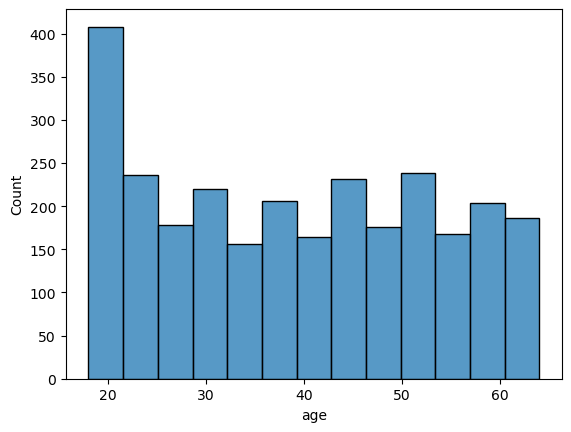

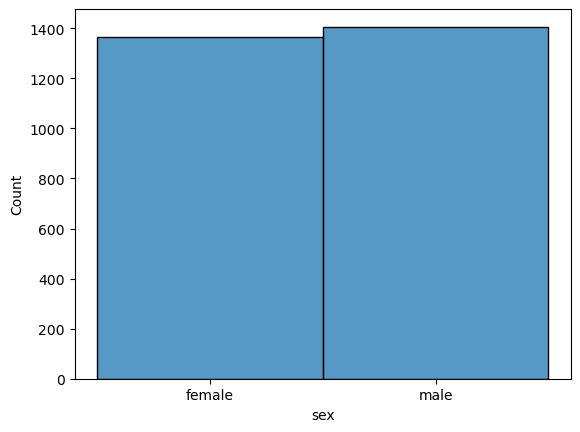

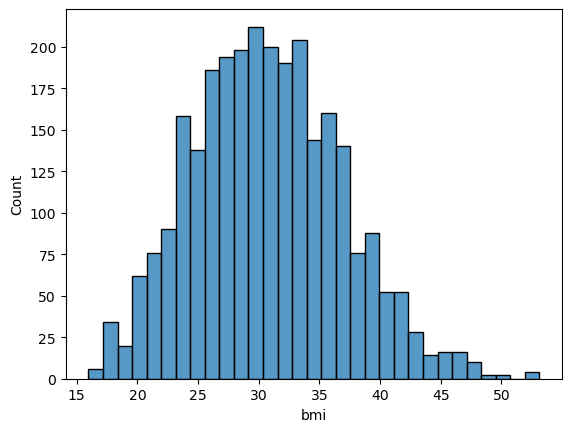

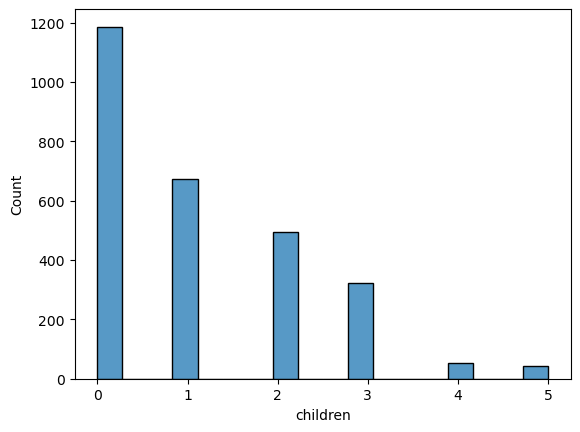

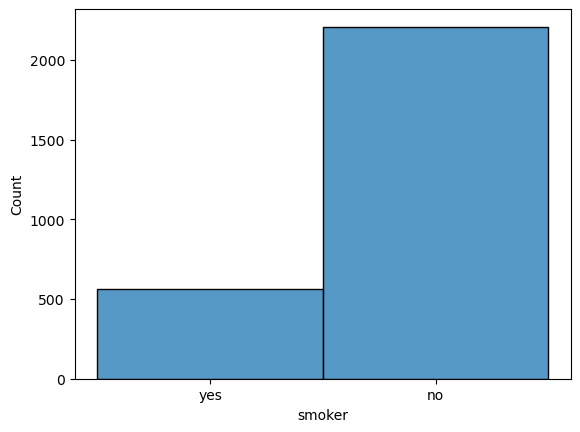

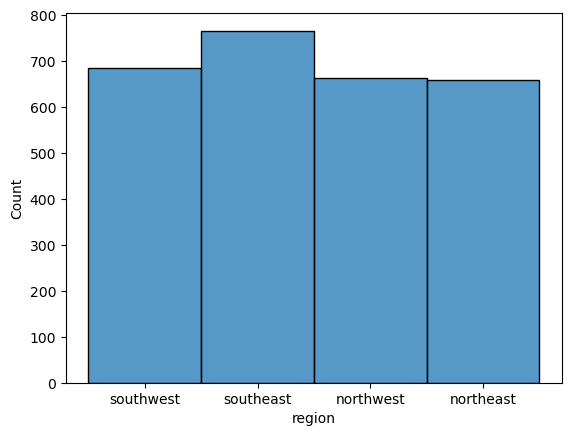

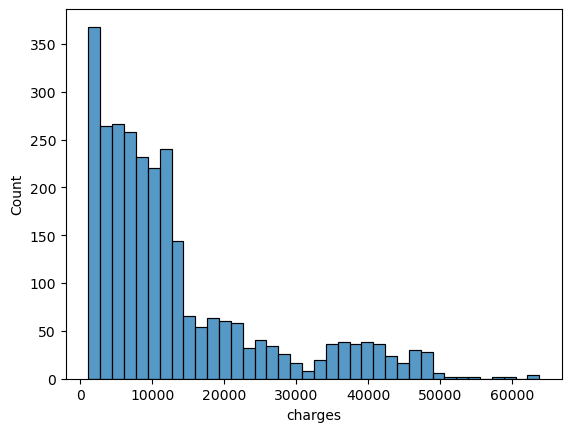

In [127]:
col=df.columns
for coln in col:
    plt.figure()  # create a new figure for each plot
    sns.histplot(x=coln, data=df)  # use string
    plt.show()
    df.head()

In [128]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Skew handling

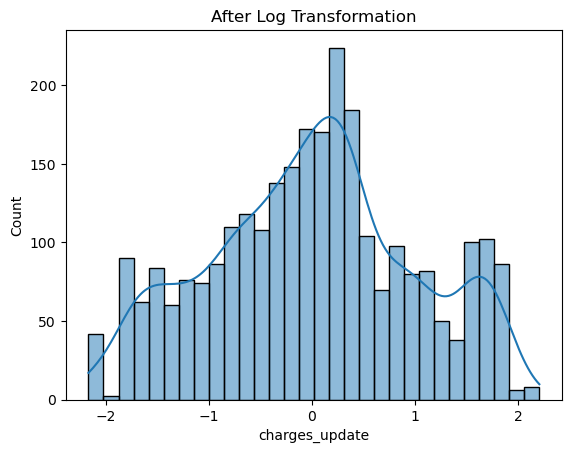

,age,sex,bmi,children,smoker,region,charges_update
0,19,female,27.900,0,yes,southwest,0.683128
1,18,male,33.770,1,no,southeast,-1.735821
2,28,male,33.000,3,no,southeast,-0.760071
3,33,male,22.705,0,no,northwest,0.978675
4,32,male,28.880,0,no,northwest,-0.907173


In [9]:
#Mild skewness → sqrt / cube root
#High skewness → log / Box-Cox / Yeo-Johnson
#Negative values present → Yeo-Johnson
skew(df["charges"])
pt = PowerTransformer(method="yeo-johnson")
df["charges_update"] = pt.fit_transform(df[["charges"]])

#after process
sns.histplot(df["charges_update"], kde=True, bins=30)
plt.title("After Log Transformation")
plt.show()
df.head()
skew(df['charges_update'])

#drop colum
#df.drop(['charges_yeojohnson', "charges"], axis=1,inplace=True)
df.drop([ "charges"], axis=1,inplace=True)
df.to_csv("Medical_Insurance_Preprocessed.csv", index=False)
df.head()


In [58]:
df1=pd.read_csv('Medical_Insurance_Preprocessed.csv')
df1.head()

,age,sex,bmi,children,smoker,region,charges_update
0,19,female,27.900,0,yes,southwest,0.683128
1,18,male,33.770,1,no,southeast,-1.735821
2,28,male,33.000,3,no,southeast,-0.760071
3,33,male,22.705,0,no,northwest,0.978675
4,32,male,28.880,0,no,northwest,-0.907173


Outliner Check

In [ ]:
# Find IQR
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df1[(df1['age'] < lower_bound) | (df1['age'] > upper_bound)]
print("Outliers count per column:\n", outliers.count())
print("Total BMI outliers:", outliers.shape[0])

# ✅ Remove outliers
data=df1[(df1['age'] >= lower_bound) & (df1['age'] <= upper_bound)]

print("Original shape:", df1.shape)
print("After removing outliers:", data.shape)



Outliers count per column:
 age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges_update    0
dtype: int64
Total BMI outliers: 0
Original shape: (2772, 7)
After removing outliers: (2772, 7)


In [71]:
Q1 = df1['charges_update'].quantile(0.25)
Q3 = df1['charges_update'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['charges_update'] < lower_bound) | (df1['charges_update'] > upper_bound)]

print(outliers)


Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges_update]
Index: []


In [73]:

df1= pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df1

,age,bmi,children,charges_update,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.683128,False,True,False,False,True
1,18,33.770,1,-1.735821,True,False,False,True,False
2,28,33.000,3,-0.760071,True,False,False,True,False
3,33,22.705,0,0.978675,True,False,True,False,False
4,32,28.880,0,-0.907173,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,-0.061111,False,False,False,True,False
2768,21,34.600,0,-1.576204,False,False,False,False,True
2769,19,26.030,1,0.654147,True,True,True,False,False
2770,23,18.715,0,0.958572,True,False,True,False,False


In [74]:
X = df1.drop(["charges_update"], axis=1)
y=df1['charges_update']


In [75]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
2767,47,45.320,1,False,False,False,True,False
2768,21,34.600,0,False,False,False,False,True
2769,19,26.030,1,True,True,True,False,False
2770,23,18.715,0,True,False,True,False,False


In [76]:
y

0       0.683128
1      -1.735821
2      -0.760071
3       0.978675
4      -0.907173
          ...   
2767   -0.061111
2768   -1.576204
2769    0.654147
2770    0.958572
2771    0.089953
Name: charges_update, Length: 2772, dtype: float64

Model Creation

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
Model=LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

Model Evaluvation

In [82]:
y_pred = Model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Prediction Accuracy (%):", round(r2 * 100, 2))

Prediction Accuracy (%): 75.18
